# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Stroke Data Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-warning">

# <span style=" color:red"> Stroke Data Project
</span>

Welcome to the data analysis assignment on the Stroke Data Project! In this assignment, we will work with a dataset containing information about various strokes. According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).

ın the current dataset, there are 11 features and one binary target. A brief information about the features are given below

id: Identification number of the individual.

gender: Gender of the individual.

hypertension: Health related parameter, does person have hypertension.

heart_disease: Health related parameter, does person have heart disease.

ever_married: Personal information, is person married on not?

work_type: Nature of work place. Options; Private, Self-employed, Goverment_Job , Newer Worked and children

Residence_type: Residence type of the individual. Urban or Rural

avg_glucose_level: average glucose level in blood for the individual.

bmi: body mass index of the individual.

smoking_status: Habitual information. Current smoking status of individual. Options; Never smoked, Smokes,Formerly smoked, Unknown stroke: Our taget, is person suffered heart attack?

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
</span>

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
import scipy.stats as stats
from tabulate import tabulate
import matplotlib.ticker as mtick

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

warnings.filterwarnings('ignore') 

In [10]:
df0 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df0.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.shape

(5110, 12)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int8   
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int8   
 4   heart_disease      5109 non-null   int8   
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   int8   
 7   residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int8   
 11  stroke             5109 non-null   int8   
dtypes: float64(3), int64(1), int8(6), object(2)
memory usage: 309.3+ KB


In [19]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [21]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [23]:
df.columns = [x.lower().replace(" ", "_") for x in df.columns]
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 
</span>

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

In [26]:
# distribution of missing data reviewed
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

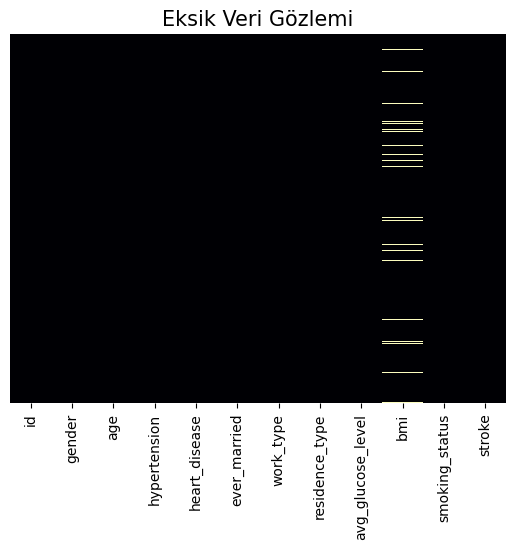

In [28]:
#distribution of missing data reviewed with heatmap
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma');
plt.title("Eksik Veri Gözlemi", fontsize = 15)
plt.show()

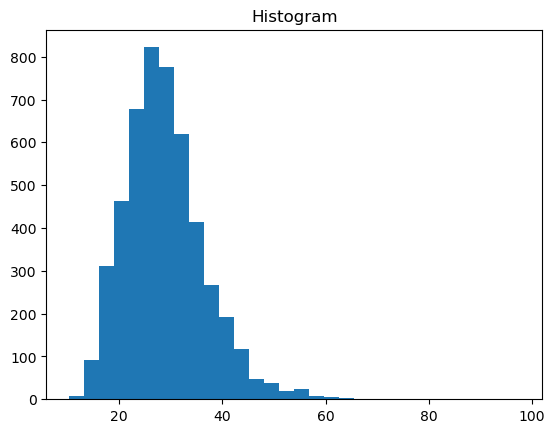

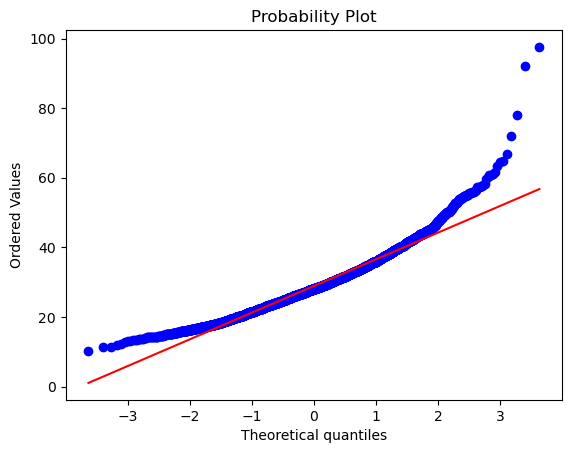

In [30]:
# Histogram
plt.hist(df['bmi'].dropna(), bins=30)
plt.title('Histogram')
plt.show()

# Q-Q Plot
stats.probplot(df['bmi'].dropna(), dist="norm", plot=plt)
plt.show()

In [32]:
from scipy.stats import shapiro, kstest

# The distribution of the bmi variable was evaluated in the shapiro-wilks test. 
stat, p = shapiro(df['bmi'].dropna())
print(f"Shapiro-Wilk Testi: Test İstatistiği = {stat}, p-değeri = {p}")


Shapiro-Wilk Testi: Test İstatistiği = 0.9535468320743545, p-değeri = 6.615876600227794e-37


In [34]:
#missing data was assigned a median value because the bmi variable was not normally distributed in the shapiro wilks test
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
#duplicate data checked. no duplicate data found
df.duplicated().sum()

0

In [38]:
df.rename(columns={'Residence_type' :'residence_type'}, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
# Filter rows with gender “other” and reassign them to the data frame
df = df[df['gender'] != 'Other']

print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Name: count, dtype: int64


In [42]:
#changed the data type of binomial variables to object
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')
df['ever_married'] = df['ever_married'].astype('object')
df['stroke'] = df['stroke'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   object 
 4   heart_disease      5109 non-null   object 
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 518.9+ KB


In [44]:
#  Only columns of type object and category selected
categorical_columns = df.select_dtypes(include=['object','category']).columns
# Frequency and percentage information for all categorical columns
summary_dict = {}

for col in categorical_columns:
    summary = df[col].value_counts(normalize=False).to_frame('Count')
    summary['Percentage'] = round((df[col].value_counts(normalize=True) * 100),1)
    summary_dict[col] = summary

final_summary = pd.DataFrame()

for col, summary in summary_dict.items():
    print(f"\nColumn: {col}")
    print(tabulate(summary.reset_index().rename(columns={'index': 'Value'}), headers='keys', tablefmt='pretty'))


Column: gender
+---+--------+-------+------------+
|   | gender | Count | Percentage |
+---+--------+-------+------------+
| 0 | Female | 2994  |    58.6    |
| 1 |  Male  | 2115  |    41.4    |
+---+--------+-------+------------+

Column: hypertension
+---+--------------+--------+------------+
|   | hypertension | Count  | Percentage |
+---+--------------+--------+------------+
| 0 |     0.0      | 4611.0 |    90.3    |
| 1 |     1.0      | 498.0  |    9.7     |
+---+--------------+--------+------------+

Column: heart_disease
+---+---------------+--------+------------+
|   | heart_disease | Count  | Percentage |
+---+---------------+--------+------------+
| 0 |      0.0      | 4833.0 |    94.6    |
| 1 |      1.0      | 276.0  |    5.4     |
+---+---------------+--------+------------+

Column: ever_married
+---+--------------+-------+------------+
|   | ever_married | Count | Percentage |
+---+--------------+-------+------------+
| 0 |     Yes      | 3353  |    65.6    |
| 1 |      

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

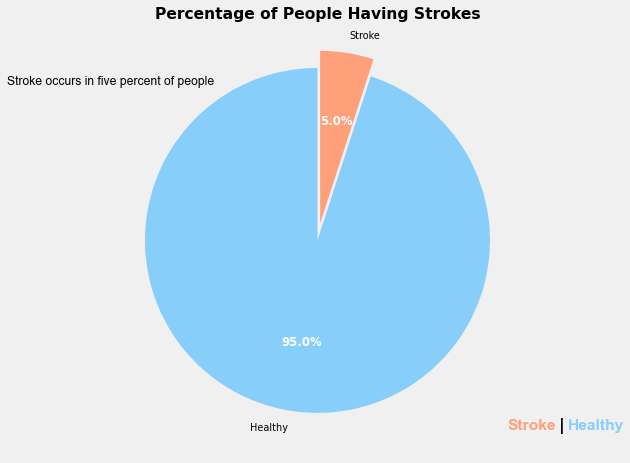

In [47]:

labels = ['Healthy', 'Stroke']
colors = ['#87CEFA', '#FFA07A'] 
sizes = [95, 5]  
explode = (0, 0.1)  


fig, ax = plt.subplots(figsize=(8, 8), dpi=70)
fig.patch.set_facecolor('#f0f0f0')  
ax.set_facecolor('#f0f0f0')  

wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90
)

plt.text(1.1, -1.1, 'Stroke', fontfamily='Arial', weight='bold', size=16, style='normal', color='#FFA07A')
plt.text(1.4, -1.1, '|', color='black', size=16, weight='bold')
plt.text(1.45, -1.1, 'Healthy', fontfamily='Arial', weight='bold', size=16, style='normal', color='#87CEFA')
plt.text(-1.8, 0.9, 'Stroke occurs in five percent of people',
         fontfamily='Arial', size=12.5, color='black')

plt.setp(autotexts, size=12, weight='bold', color='white')

plt.title("Percentage of People Having Strokes", fontweight='bold', fontsize=16, color='black')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

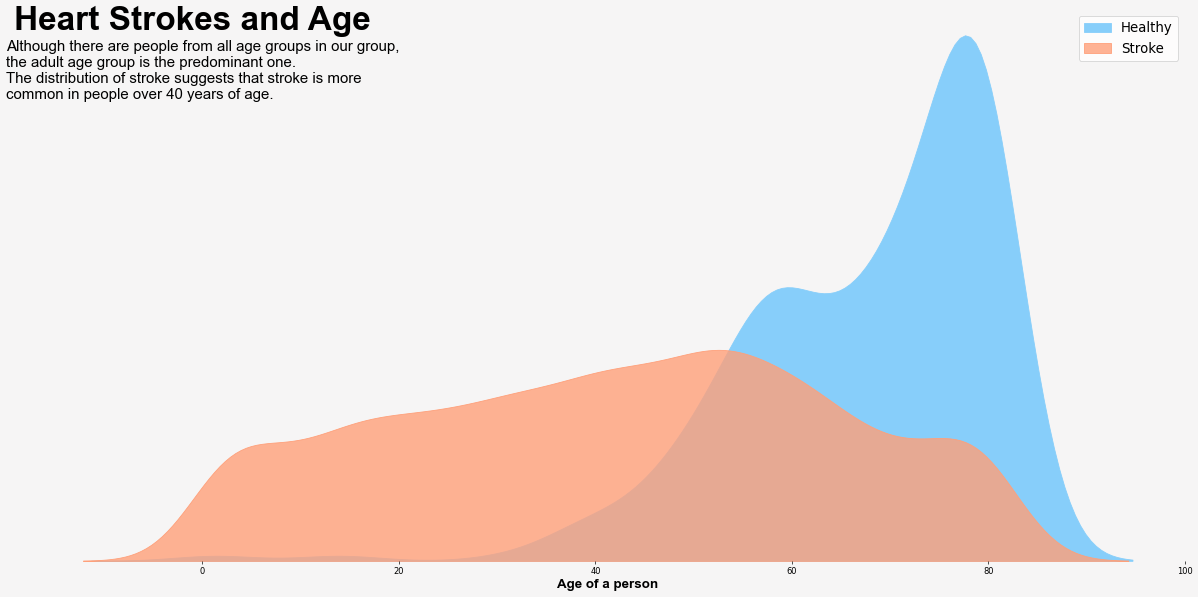

In [50]:

fig = plt.figure(figsize=(20, 10), dpi=60)

ax = fig.add_subplot(111)  

ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('#f6f5f5')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

sns.kdeplot(data=df[df['stroke'] == 1], x='age', ax=ax, shade=True, alpha=1, color='#87CEFA', label="Healthy")
sns.kdeplot(data=df[df['stroke'] == 0], x='age', ax=ax, shade=True, alpha=0.8, color='#FFA07A', label="Stroke")

ax.set_xlabel('Age of a person', fontdict={'font': 'Arial', 'color': 'black', 'size': 16, 'weight': 'bold'})

ax.text(-20, 0.035, 
        ('Although there are people from all age groups in our group,\n'
         'the adult age group is the predominant one.\n'
         'The distribution of stroke suggests that stroke is more\n'
         'common in people over 40 years of age.'),
        fontdict={'font': 'Arial', 'size': 18, 'color': 'black'})

ax.legend(fontsize=16, loc='upper right')

fig.text(0.01, 0.95, 'Heart Strokes and Age',
         fontdict={'font': 'Arial', 'weight': 'bold', 'color': 'black', 'size': 40})

plt.tight_layout()
plt.show();



<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

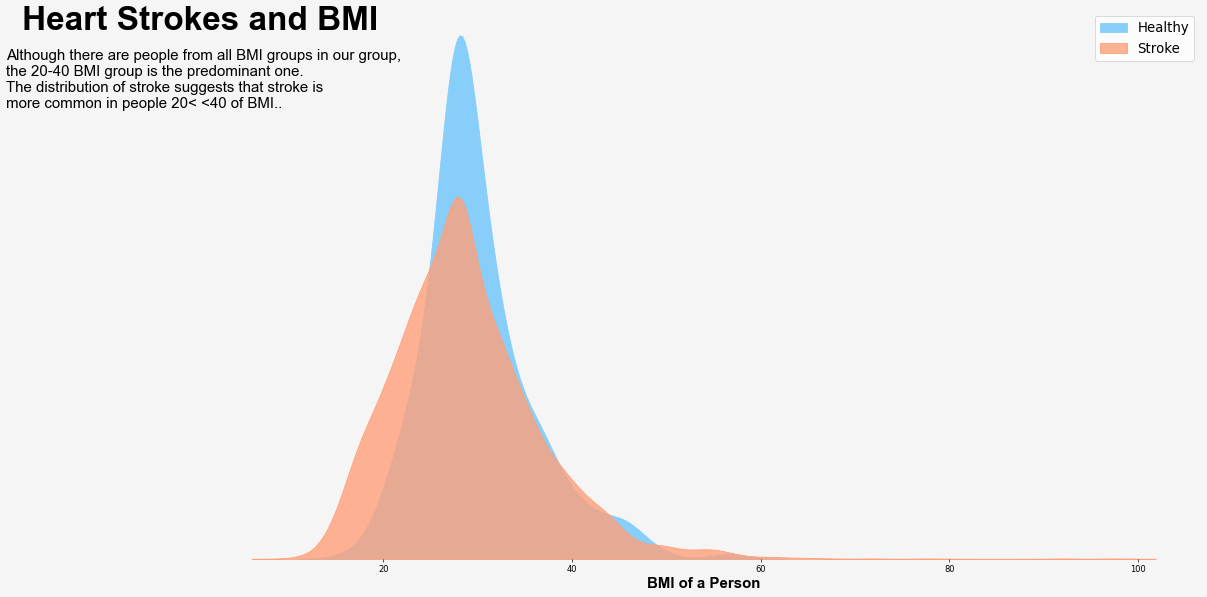

In [53]:

fig = plt.figure(figsize=(20, 10), dpi=60)

ax = fig.add_subplot(111)  

ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('#f6f5f5')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

sns.kdeplot(data=df[df['stroke'] == 1], x='bmi', ax=ax, shade=True, alpha=1, color='#87CEFA', label="Healthy")
sns.kdeplot(data=df[df['stroke'] == 0], x='bmi', ax=ax, shade=True, alpha=0.8, color='#FFA07A', label="Stroke")

ax.set_xlabel('BMI of a Person', fontdict={'font': 'Arial', 'color': 'black', 'size': 18, 'weight': 'bold'})


ax.text(-20, 0.08, 
        ('Although there are people from all BMI groups in our group,\n'
         'the 20-40 BMI group is the predominant one.\n'
         'The distribution of stroke suggests that stroke is\n'
         'more common in people 20< <40 of BMI..'),
        fontdict={'font': 'Arial', 'size': 18, 'color': 'black'})

ax.legend(fontsize=16, loc='upper right')

fig.text(0.01, 0.95, 'Heart Strokes and BMI',
         fontdict={'font': 'Arial', 'weight': 'bold', 'color': 'black', 'size': 40})

plt.tight_layout()
plt.show();

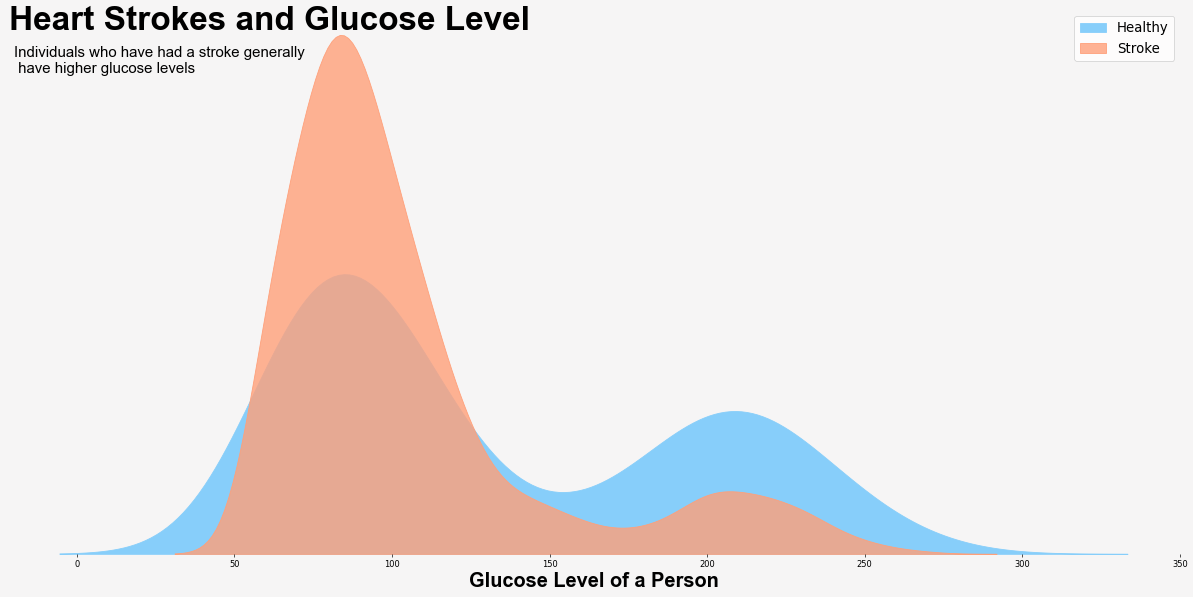

In [55]:

fig = plt.figure(figsize=(20, 10), dpi=60)

ax = fig.add_subplot(111)  

ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('#f6f5f5')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', ax=ax, shade=True, alpha=1, color='#87CEFA', label="Healthy")
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', ax=ax, shade=True, alpha=0.8, color='#FFA07A', label="Stroke")

ax.set_xlabel('Glucose Level of a Person', fontdict={'font': 'Arial', 'color': 'black', 'size': 24, 'weight': 'bold'})


ax.text(-20, 0.015, 
        ('Individuals who have had a stroke generally\n have higher glucose levels'),
        fontdict={'font': 'Arial', 'size': 18, 'color': 'black'})

ax.legend(fontsize=16, loc='upper right')

fig.text(0.01, 0.95, 'Heart Strokes and Glucose Level',
         fontdict={'font': 'Arial', 'weight': 'bold', 'color': 'black', 'size': 40})

plt.tight_layout()
plt.show();

<Figure size 1200x600 with 0 Axes>

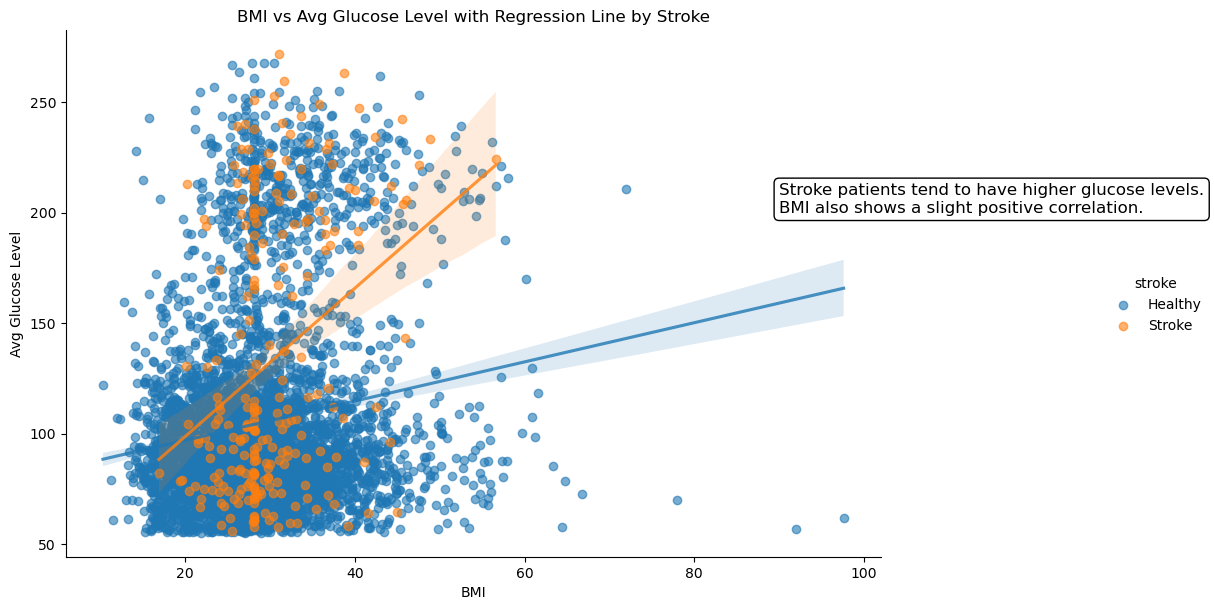

In [57]:
plt.figure(figsize=(12, 6))
g = sns.lmplot(
    x="bmi",                    
    y="avg_glucose_level",       
    hue="stroke",   
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.6},
    line_kws={'alpha': 0.8}
)


new_labels = ['Healthy', 'Stroke']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l) 

plt.xlabel("BMI")
plt.ylabel("Avg Glucose Level")
plt.title("BMI vs Avg Glucose Level with Regression Line by Stroke")
plt.text(
    x=90,  
    y=200,  
    s="Stroke patients tend to have higher glucose levels.\nBMI also shows a slight positive correlation.",
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  
)
plt.show();

The orange regression line for the “Stroke” group shows a slight increase in mean glucose level as BMI increases. The blue regression line for the “Healthy” group shows a similar increase, but with a lower slope, emphasizing that patients with stroke have higher glucose levels and that there is a slight positive correlation between BMI and glucose level.

Individuals who have had a stroke (orange dots) generally have higher glucose levels. BMI values seem to be spread over a wider range (low to high) among stroke survivors. Healthy individuals, on average, have lower glucose levels.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

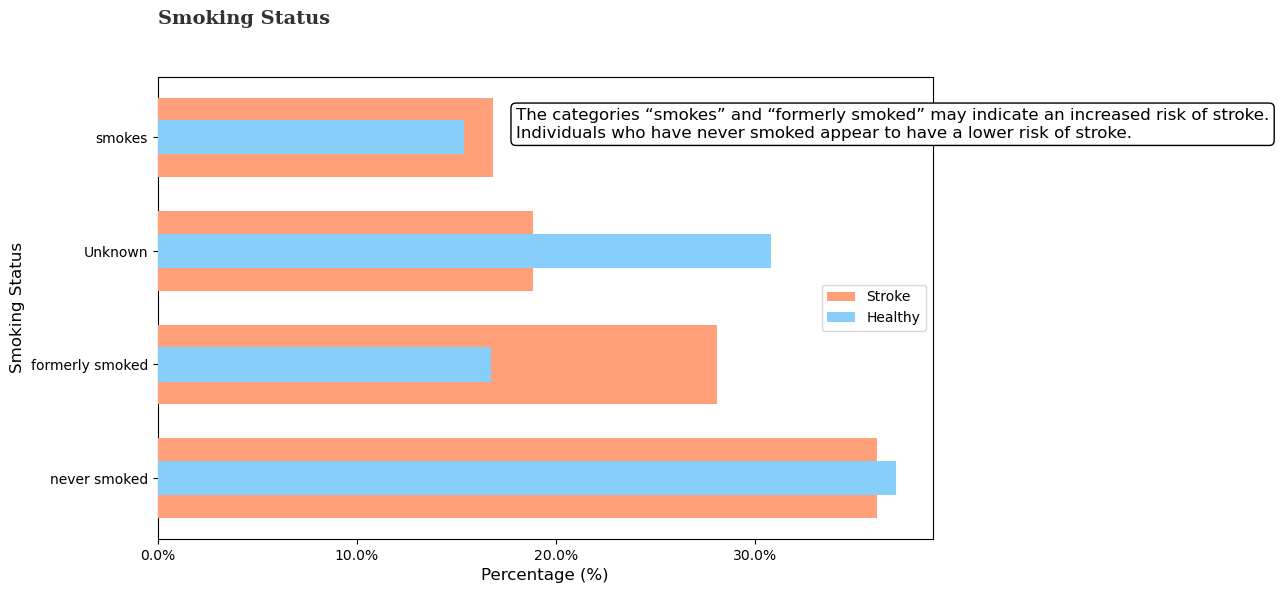

In [61]:
import matplotlib.ticker as mtick

positive = df[df['stroke'] == 1]["smoking_status"].value_counts().to_frame(name="Count")
positive["Percentage"] = positive["Count"].apply(lambda x: x / sum(positive["Count"]) * 100)

negative = df[df['stroke'] == 0]["smoking_status"].value_counts().to_frame(name="Count")
negative["Percentage"] = negative["Count"].apply(lambda x: x / sum(negative["Count"]) * 100)

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#FFA07A", zorder=3, height=0.7, label="Stroke")
ax1.barh(negative.index, negative['Percentage'], color="#87CEFA", zorder=3, height=0.3, label="Healthy")


ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))


ax1.set_xlabel("Percentage (%)", fontsize=12)
ax1.set_ylabel("Smoking Status", fontsize=12)
ax1.legend()


plt.text(
    x=18,  
    y=3,  
    s="The categories “smokes” and “formerly smoked” may indicate an increased risk of stroke.\nIndividuals who have never smoked appear to have a lower risk of stroke.",
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  
)

plt.show()

A significant proportion of people who have had a stroke are in the “formerly smoked” category. This may indicate that smoking can affect the risk of stroke even if smoking has been stopped. “Never smoked” individuals make up a larger percentage of the healthy group, suggesting that never smoking may reduce the risk of stroke. Uncertainty of smoking status: There is also a significant group in the “unknown” category. This suggests that not knowing the exact smoking status may be a limitation for the analysis.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

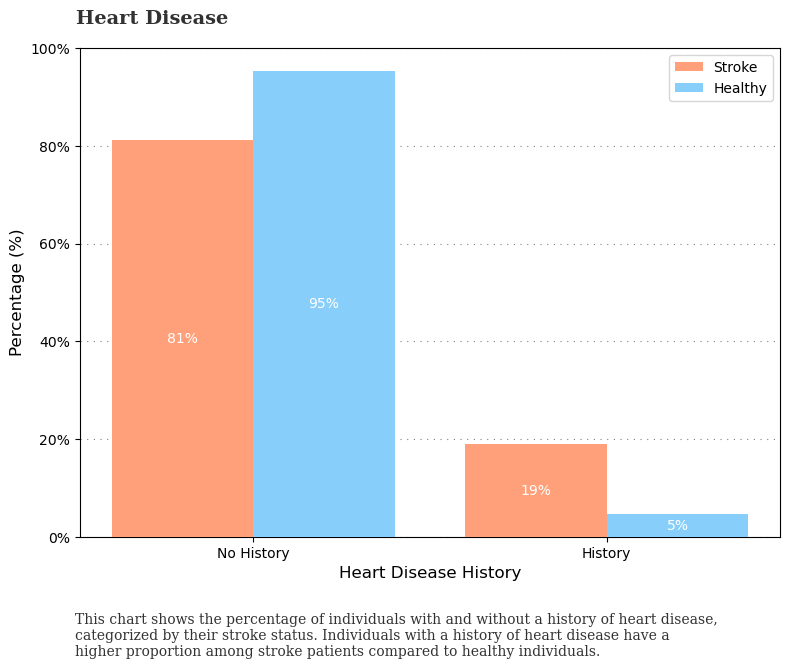

In [65]:
positive = df[df['stroke'] == 1]["heart_disease"].value_counts().to_frame(name="Count")
positive["Percentage"] = positive["Count"].apply(lambda x: x / sum(positive["Count"]) * 100)

negative = df[df['stroke'] == 0]["heart_disease"].value_counts().to_frame(name="Count")
negative["Percentage"] = negative["Count"].apply(lambda x: x / sum(negative["Count"]) * 100)

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(positive))
ax.text(-0.3, 105, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))


ax.bar(x, height=positive["Percentage"], zorder=3, color="#FFA07A", width=0.4, label="Stroke")
ax.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#87CEFA", width=0.4, label="Healthy")


ax.set_xticks(x + 0.4 / 2)
ax.set_xticklabels(['No History', 'History'])


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))


for i, j in zip(x, positive["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i, j/2), color='white', horizontalalignment='center', verticalalignment='center')
for i, j in zip(x, negative["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i + 0.4, j/2), color='white', horizontalalignment='center', verticalalignment='center')


ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Heart Disease History', fontsize=12)
ax.legend()


fig.text(
    0.1, -0.1,  
    "This chart shows the percentage of individuals with and without a history of heart disease, \n"
    "categorized by their stroke status. Individuals with a history of heart disease have a \n"
    "higher proportion among stroke patients compared to healthy individuals.",
    fontsize=10, fontfamily='serif', color="#323232"
)

plt.tight_layout()
plt.show()

Among stroke survivors, the percentage with a history of heart disease is higher than among those without a history of heart disease. 
Among healthy individuals, the percentage of those with a history of heart disease is considerably lower, and those without a history of heart disease predominate in this group. In stroke survivors, the percentage of individuals with a positive history of heart disease is higher. This provides an important finding that a history of heart disease may be a risk factor for stroke

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

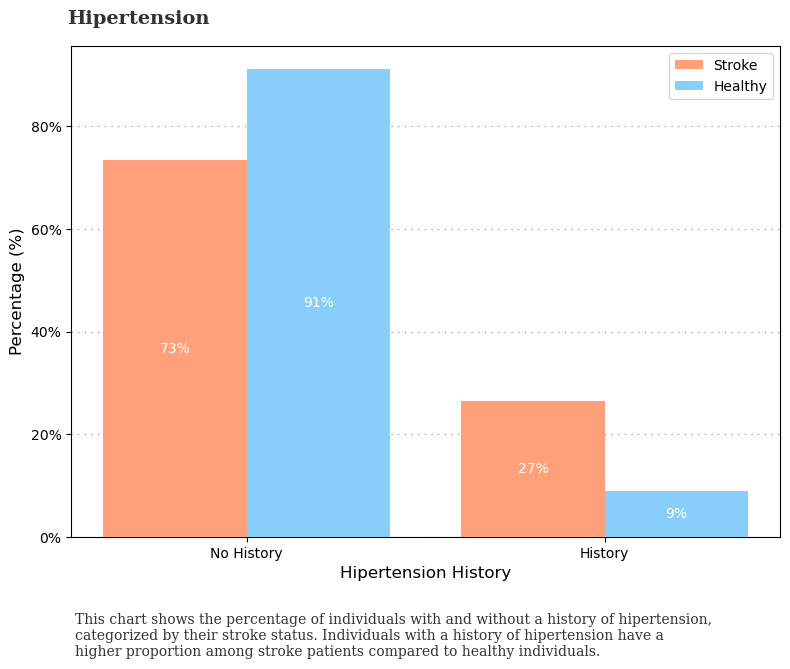

In [69]:
positive = df[df['stroke'] == 1]["hypertension"].value_counts().to_frame(name="Count")
positive["Percentage"] = positive["Count"].apply(lambda x: x / sum(positive["Count"]) * 100)

negative = df[df['stroke'] == 0]["hypertension"].value_counts().to_frame(name="Count")
negative["Percentage"] = negative["Count"].apply(lambda x: x / sum(negative["Count"]) * 100)

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(positive))
ax.text(-0.3, 100, 'Hipertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))


ax.bar(x, height=positive["Percentage"], zorder=3, color="#FFA07A", width=0.4, label="Stroke")
ax.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#87CEFA", width=0.4, label="Healthy")


ax.set_xticks(x + 0.4 / 2)
ax.set_xticklabels(['No History', 'History'])

# Yüzde Formatı
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

# Değerleri çubuklara yazma
for i, j in zip(x, positive["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i, j/2), color='white', horizontalalignment='center', verticalalignment='center')
for i, j in zip(x, negative["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i + 0.4, j/2), color='white', horizontalalignment='center', verticalalignment='center')

# Eksen Başlıkları ve Legend
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Hipertension History', fontsize=12)
ax.legend()

# Açıklama Metni
fig.text(
    0.1, -0.1,  
    "This chart shows the percentage of individuals with and without a history of hipertension, \n"
    "categorized by their stroke status. Individuals with a history of hipertension have a \n"
    "higher proportion among stroke patients compared to healthy individuals.",
    fontsize=10, fontfamily='serif', color="#323232"
)

plt.tight_layout()
plt.show()

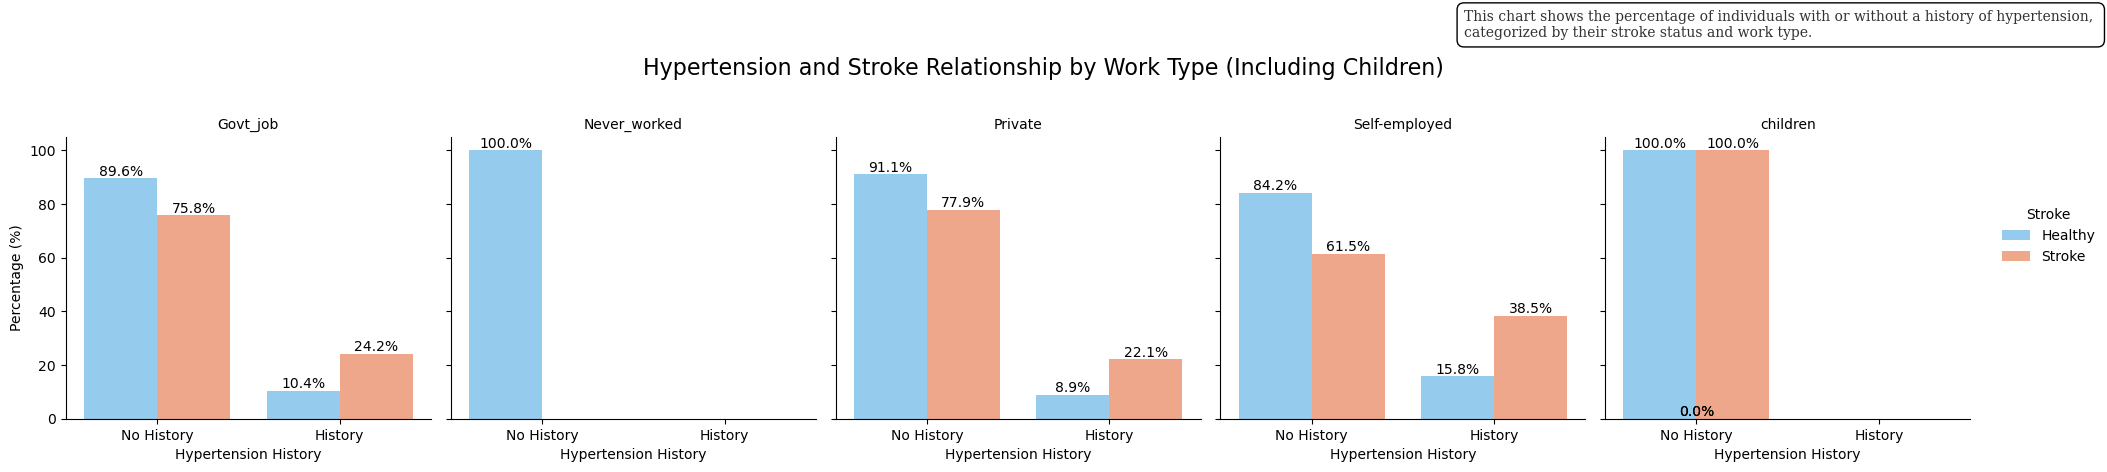

In [71]:
grouped = df.groupby(["work_type", "stroke", "hypertension"]).size().reset_index(name="Count")
grouped["Percentage"] = grouped.groupby(["work_type", "stroke"])["Count"].transform(lambda x: x / x.sum() * 100)


grouped["Hypertension"] = grouped["hypertension"].map({0: "No History", 1: "History"})
grouped["Stroke"] = grouped["stroke"].map({0: "Healthy", 1: "Stroke"})


g = sns.catplot(
    data=grouped,
    x="Hypertension",
    y="Percentage",
    hue="Stroke",
    col="work_type",
    kind="bar",
    height=4,
    aspect=1,
    palette={"Healthy": "#87CEFA", "Stroke": "#FFA07A"} 
)


g.set_axis_labels("Hypertension History", "Percentage (%)")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.85)  


g.fig.suptitle(
    "Hypertension and Stroke Relationship by Work Type (Including Children)",
    fontsize=16,
    y=1.05  
)


for ax in g.axes.flat:
    for p in ax.patches:
        percentage = f'{p.get_height():.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.fig.text(
    0.7, 1.1,  
    "This chart shows the percentage of individuals with or without a history of hypertension, \n"
    "categorized by their stroke status and work type. ",
    fontsize=10,
    fontfamily='serif',
    color="#323232",
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  
)
plt.show()


The rate of stroke is higher in individuals with a history of hypertension than in individuals without a history of hypertension in all job types. The rate of stroke is significantly higher in self-employed (38.5%) and government employees (24.2%) with a history of hypertension. In individuals who never worked, the rate of those with no history of hypertension was 100% and no stroke risk was observed. In the pediatric group, both hypertension and stroke risk were not observed.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

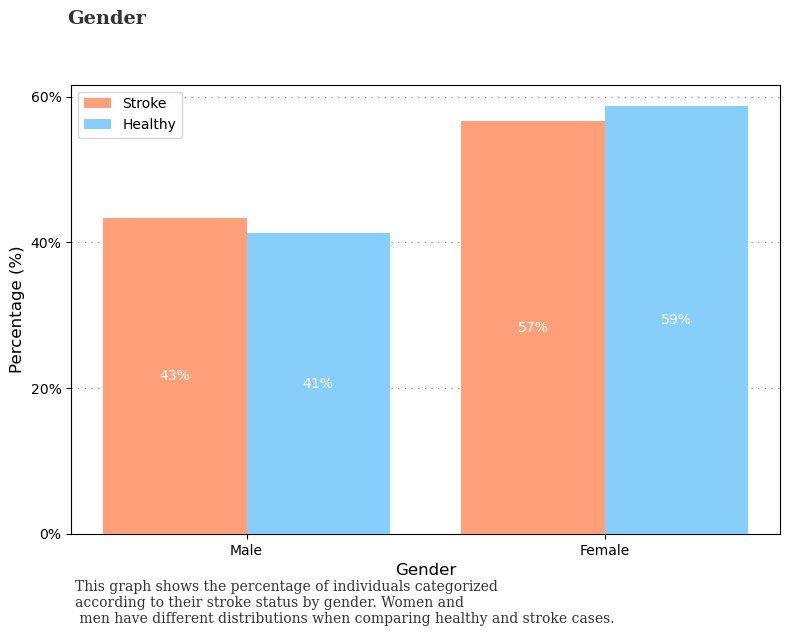

In [75]:
all_genders = df["gender"].unique()
positive = df[df['stroke'] == 1]["gender"].value_counts().reindex(all_genders, fill_value=0).reset_index()
positive.columns = ["Gender", "Count"]
positive["Percentage"] = positive["Count"].apply(lambda x: x / sum(positive["Count"]) * 100)

negative = df[df['stroke'] == 0]["gender"].value_counts().reindex(all_genders, fill_value=0).reset_index()
negative.columns = ["Gender", "Count"]
negative["Percentage"] = negative["Count"].apply(lambda x: x / sum(negative["Count"]) * 100)

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(all_genders))
ax.text(-0.3, 70, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

ax.bar(x, height=positive["Percentage"], zorder=3, color="#FFA07A", width=0.4, label="Stroke")
ax.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#87CEFA", width=0.4, label="Healthy")

ax.set_xticks(x + 0.4 / 2)
ax.set_xticklabels(all_genders)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

for i, j in zip(x, positive["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i, j / 2), color='white', horizontalalignment='center', verticalalignment='center')
for i, j in zip(x, negative["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i + 0.4, j / 2), color='white', horizontalalignment='center', verticalalignment='center')

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Gender', fontsize=12)
ax.legend()


fig.text(
    0.1, -0.05, 
    "This graph shows the percentage of individuals categorized \naccording to their stroke status by gender. Women and\n men have different distributions when comparing healthy and stroke cases.",
    fontsize=10, fontfamily='serif', color="#323232"
)
plt.tight_layout()
plt.show();

Women have a higher stroke rate than men in most types of work. Women are particularly at higher risk in the government (Govt_job) and private sector (Private) categories. Men generally have a higher percentage in the Healthy category. No stroke survivors were observed among children (Children) and never_worked individuals (Never_worked). These groups consist of completely healthy individuals.

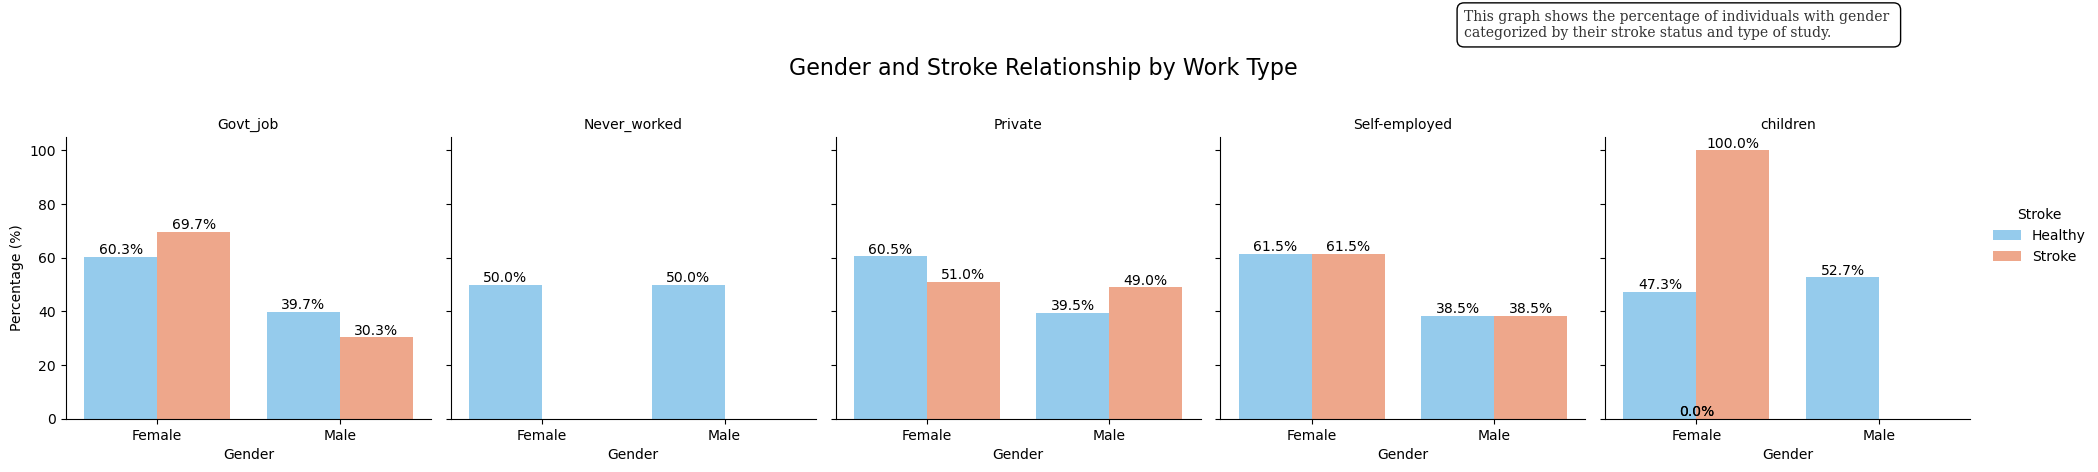

In [78]:

grouped = df.groupby(["work_type", "stroke", "gender"]).size().reset_index(name="Count")
grouped["Percentage"] = grouped.groupby(["work_type", "stroke"])["Count"].transform(lambda x: x / x.sum() * 100)


#grouped["Hypertension"] = grouped["gender"].map({0: "No Histo, 1: "History"})
grouped["Stroke"] = grouped["stroke"].map({0: "Healthy", 1: "Stroke"})

g = sns.catplot(
    data=grouped,
    x="gender",
    y="Percentage",
    hue="Stroke",
    col="work_type",
    kind="bar",
    height=4,
    aspect=1,
    palette={"Healthy": "#87CEFA", "Stroke": "#FFA07A"} 
)

g.set_axis_labels("Gender", "Percentage (%)")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.85)  

g.fig.suptitle(
    "Gender and Stroke Relationship by Work Type",
    fontsize=16,
    y=1.05  
)


for ax in g.axes.flat:
    for p in ax.patches:
        percentage = f'{p.get_height():.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.fig.text(
    0.7, 1.1,  
    "This graph shows the percentage of individuals with gender \ncategorized by their stroke status and type of study. ",
    fontsize=10,
    fontfamily='serif',
    color="#323232",
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  
)
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

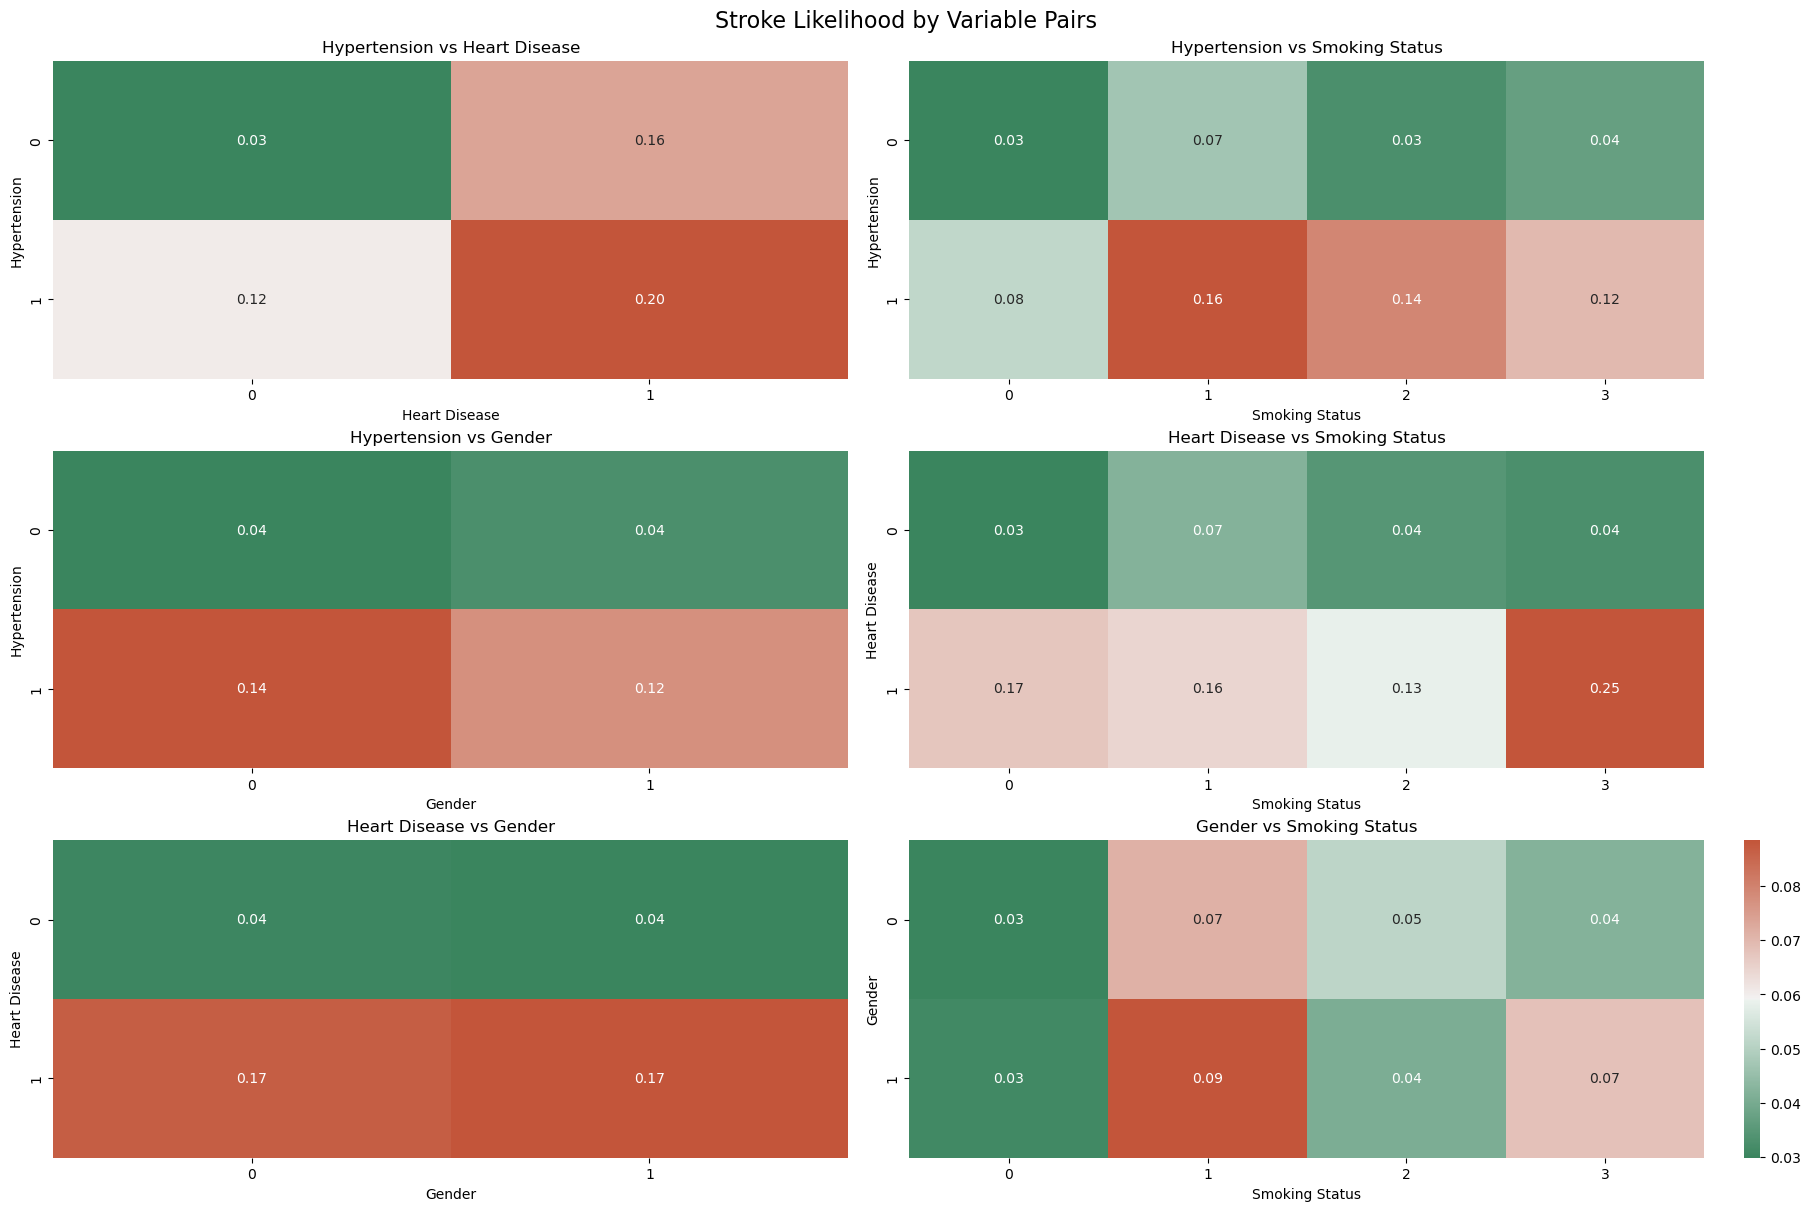

In [81]:

variable_pairs = [
    ('hypertension', 'heart_disease'),
    ('hypertension', 'smoking_status'),
    ('hypertension', 'gender'),
    ('heart_disease', 'smoking_status'),
    #('gender', 'work_type'),
    ('heart_disease', 'gender'),
    ('gender', 'smoking_status'),
    #('hypertension', 'work_type'),
    #('heart_disease', 'work_type'),
    #('smoking_status', 'work_type')
]
for col in ['hypertension', 'heart_disease', 'smoking_status', 'gender', 'work_type', 'stroke']:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes  

cmap = sns.diverging_palette(145, 20, as_cmap=True)


rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), constrained_layout=True)

def format_variable_name(var):
    return ' '.join(word.capitalize() for word in var.split('_'))

for i, (var1, var2) in enumerate(variable_pairs):
    row = i // cols
    col = i % cols
    
    heatmap_data = df.groupby([var1, var2])['stroke'].mean().unstack()
    
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap=cmap, 
        cbar=(i == len(variable_pairs) - 1), 
        ax=axes[row, col]
    )
    
    
    axes[row, col].set_title(f'{format_variable_name(var1)} vs {format_variable_name(var2)}')
    axes[row, col].set_xlabel(format_variable_name(var2))
    axes[row, col].set_ylabel(format_variable_name(var1))


for j in range(len(variable_pairs), rows * cols):
    fig.delaxes(axes.flatten()[j])


plt.suptitle('Stroke Likelihood by Variable Pairs', fontsize=16)
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do lifestyle and residence type influence stroke patterns?
</span>

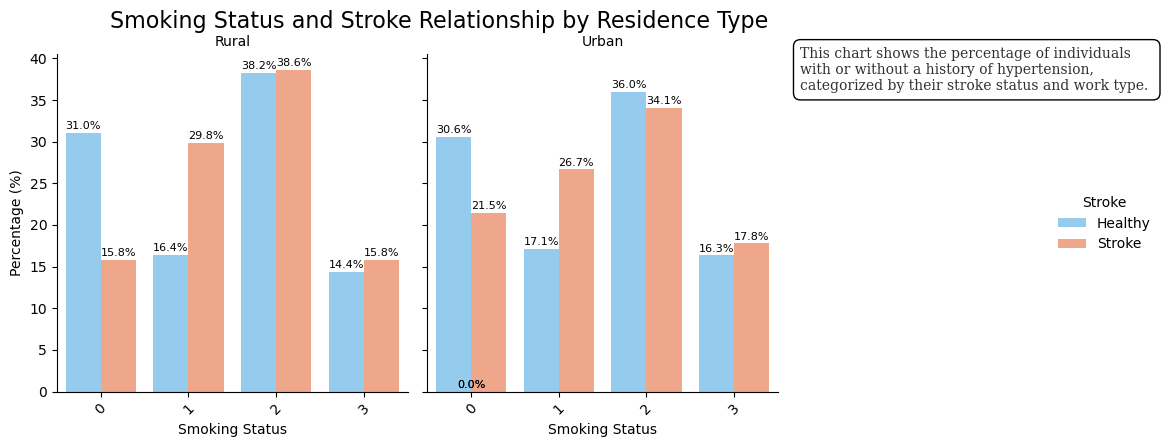

In [84]:
grouped = df.groupby(["smoking_status", "stroke", "residence_type"]).size().reset_index(name="Count")
grouped["Percentage"] = grouped.groupby(["residence_type", "stroke"])["Count"].transform(lambda x: x / x.sum() * 100)


grouped["Stroke"] = grouped["stroke"].map({0: "Healthy", 1: "Stroke"})


g = sns.catplot(
    data=grouped,
    x="smoking_status",
    y="Percentage",
    hue="Stroke",
    col="residence_type",
    kind="bar",
    height=4,
    aspect=1,
    palette={"Healthy": "#87CEFA", "Stroke": "#FFA07A"} 
)
g.set_xticklabels(rotation=45)

g.set_axis_labels("Smoking Status", "Percentage (%)")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.99)  


g.fig.suptitle(
    "Smoking Status and Stroke Relationship by Residence Type",
    fontsize=16,
    y=1.10  
)


for ax in g.axes.flat:
    for p in ax.patches:
        percentage = f'{p.get_height():.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.fig.text(
    0.9, 0.9,  
    "This chart shows the percentage of individuals \nwith or without a history of hypertension, \n"
    "categorized by their stroke status and work type. ",
    fontsize=10,
    fontfamily='serif',
    color="#323232",
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  
)
plt.show();

<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

10-Fold Cross-Validation Scores: [0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95294118]
Average Accuracy: 0.95126280649246

Accuracy on Test Data: 0.9419439008480104

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



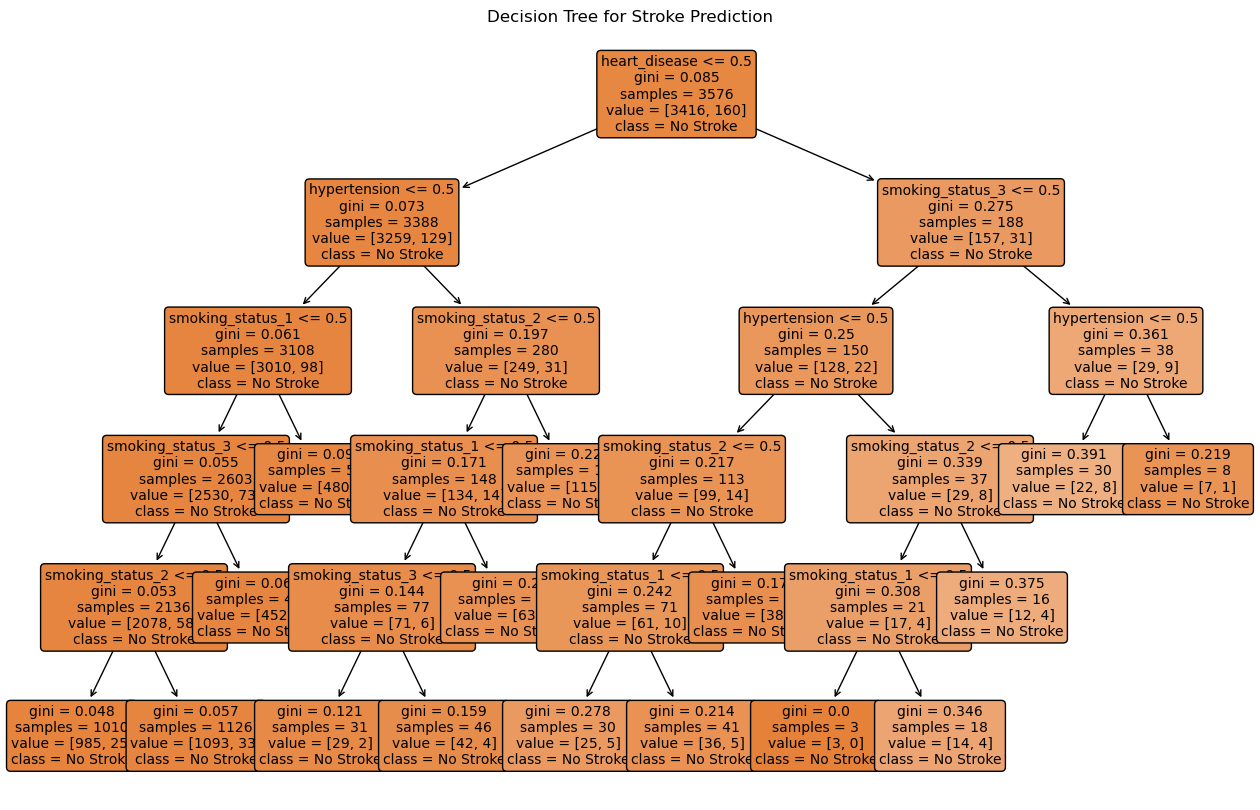

In [89]:

X = df[["hypertension", "heart_disease", "smoking_status"]]
y = df["stroke"]
le = LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(X, columns=["smoking_status"], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

print("10-Fold Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Stroke", "Stroke"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree for Stroke Prediction")
plt.show()

In [91]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9419439008480104
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [93]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9419439008480104
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [95]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9419439008480104
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

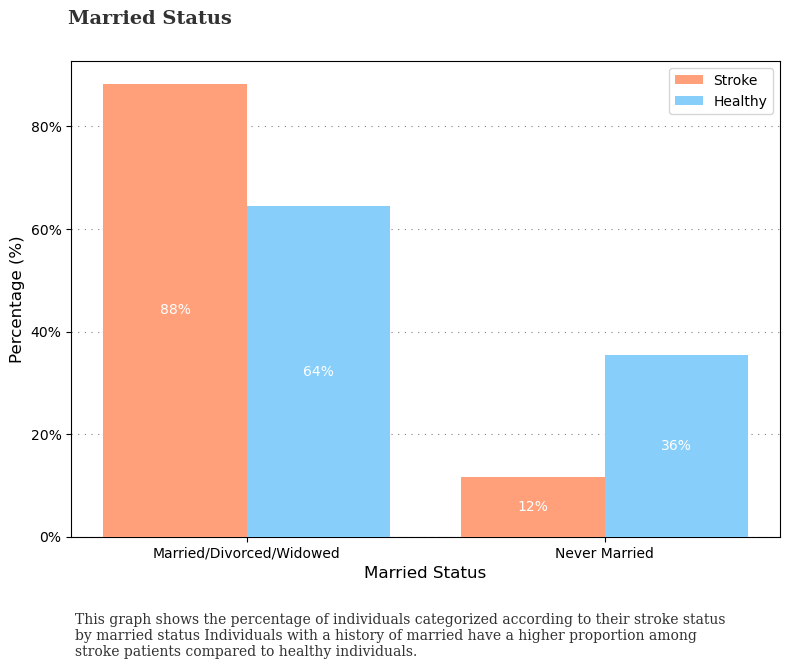

In [98]:
positive = df[df['stroke'] == 1]["ever_married"].value_counts().to_frame(name="Count")
positive["Percentage"] = positive["Count"].apply(lambda x: x / sum(positive["Count"]) * 100)

negative = df[df['stroke'] == 0]["ever_married"].value_counts().to_frame(name="Count")
negative["Percentage"] = negative["Count"].apply(lambda x: x / sum(negative["Count"]) * 100)

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(positive))
ax.text(-0.3, 100, 'Married Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))


ax.bar(x, height=positive["Percentage"], zorder=3, color="#FFA07A", width=0.4, label="Stroke")
ax.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#87CEFA", width=0.4, label="Healthy")


ax.set_xticks(x + 0.4 / 2)
ax.set_xticklabels(['Married/Divorced/Widowed', 'Never Married'])


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))


for i, j in zip(x, positive["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i, j/2), color='white', horizontalalignment='center', verticalalignment='center')
for i, j in zip(x, negative["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i + 0.4, j/2), color='white', horizontalalignment='center', verticalalignment='center')


ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Married Status', fontsize=12)
ax.legend()


fig.text(
    0.1, -0.1,  
    "This graph shows the percentage of individuals categorized according to their stroke status \nby married status Individuals with a history of married have a higher proportion among \nstroke patients compared to healthy individuals.",
    fontsize=10, fontfamily='serif', color="#323232"
)

plt.tight_layout()
plt.show()

Among stroke survivors, the percentage with a history of married is higher than among those without a history of heart disease. This provides an important finding that a history of married may be a risk factor for stroke

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are there regional trends in stroke occurrence (Urban vs Rural)?
</span>

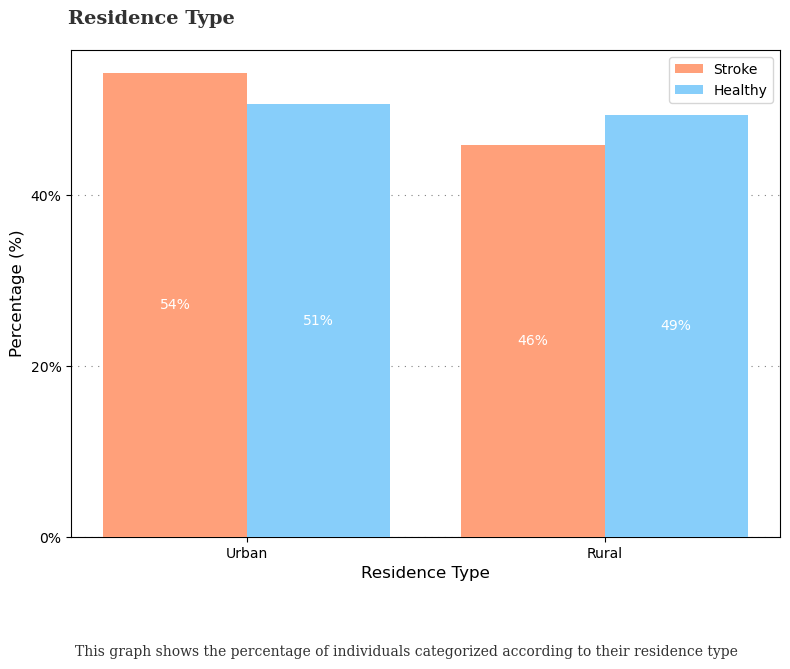

In [102]:
positive = df[df['stroke'] == 1]["residence_type"].value_counts().to_frame(name="Count")
positive["Percentage"] = positive["Count"].apply(lambda x: x / sum(positive["Count"]) * 100)

negative = df[df['stroke'] == 0]["residence_type"].value_counts().to_frame(name="Count")
negative["Percentage"] = negative["Count"].apply(lambda x: x / sum(negative["Count"]) * 100)

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(positive))
ax.text(-0.3, 60, 'Residence Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))


ax.bar(x, height=positive["Percentage"], zorder=3, color="#FFA07A", width=0.4, label="Stroke")
ax.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#87CEFA", width=0.4, label="Healthy")


ax.set_xticks(x + 0.4 / 2)
ax.set_xticklabels(['Urban', 'Rural'])


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

for i, j in zip(x, positive["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i, j/2), color='white', horizontalalignment='center', verticalalignment='center')
for i, j in zip(x, negative["Percentage"]):
    ax.annotate(f'{j:.0f}%', xy=(i + 0.4, j/2), color='white', horizontalalignment='center', verticalalignment='center')


ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Residence Type', fontsize=12)
ax.legend()

fig.text(
    0.1, -0.1,  
    "This graph shows the percentage of individuals categorized according to their residence type",
    fontsize=10, fontfamily='serif', color="#323232"
)

plt.tight_layout()
plt.show()

The similar rates of stroke between rural and urban areas may indicate that place of residence is not a significant factor in stroke. However, this may indicate that risk factors are evenly distributed or that other factors (genetics, lifestyle) are more dominant. Further analyses can be carried out to further investigate which risk factors are more influential in which regions

<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

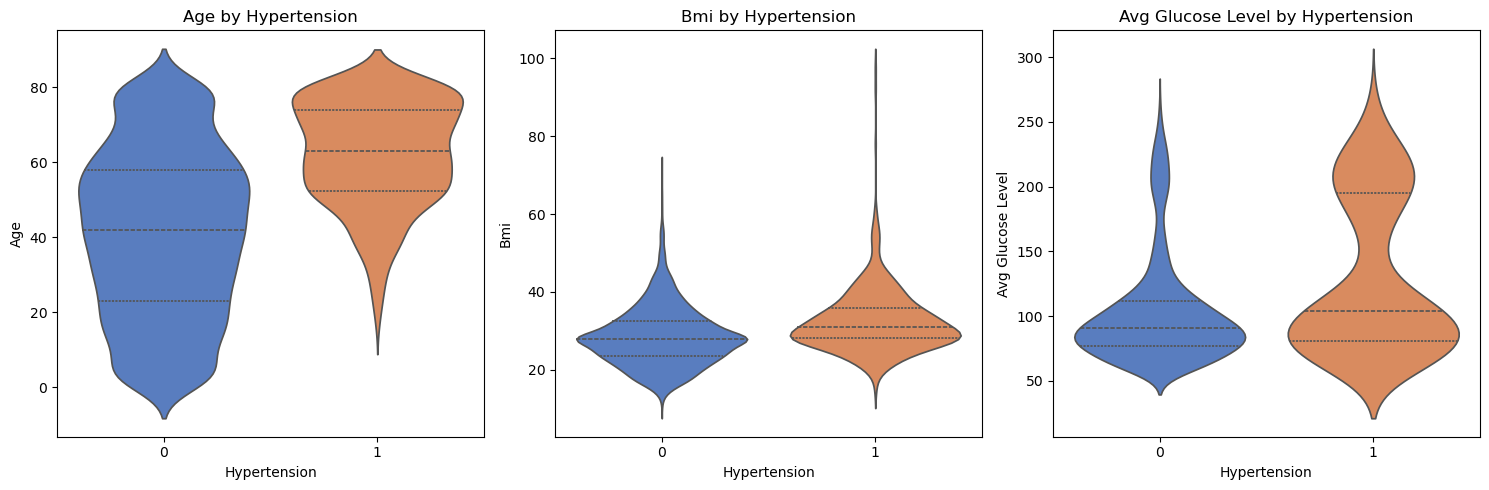

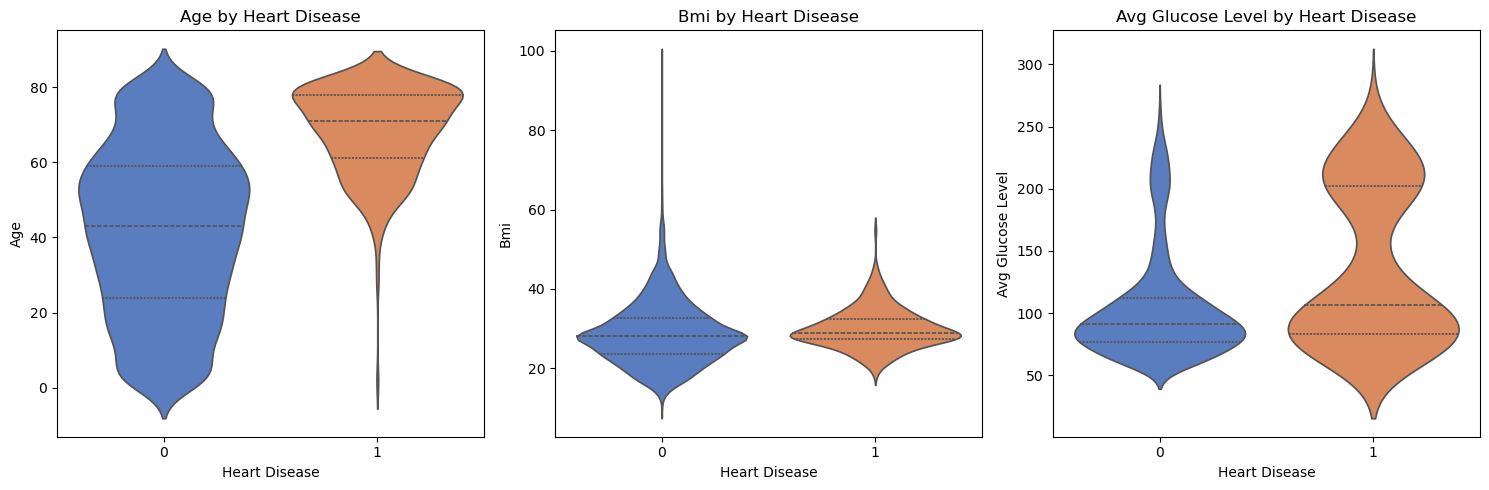

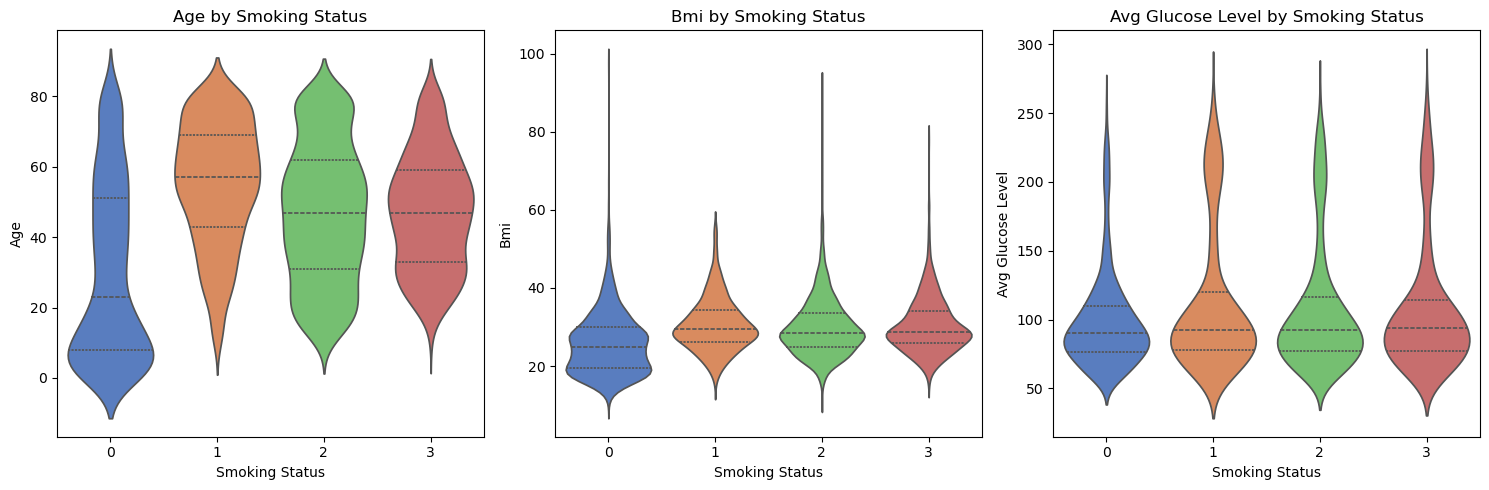

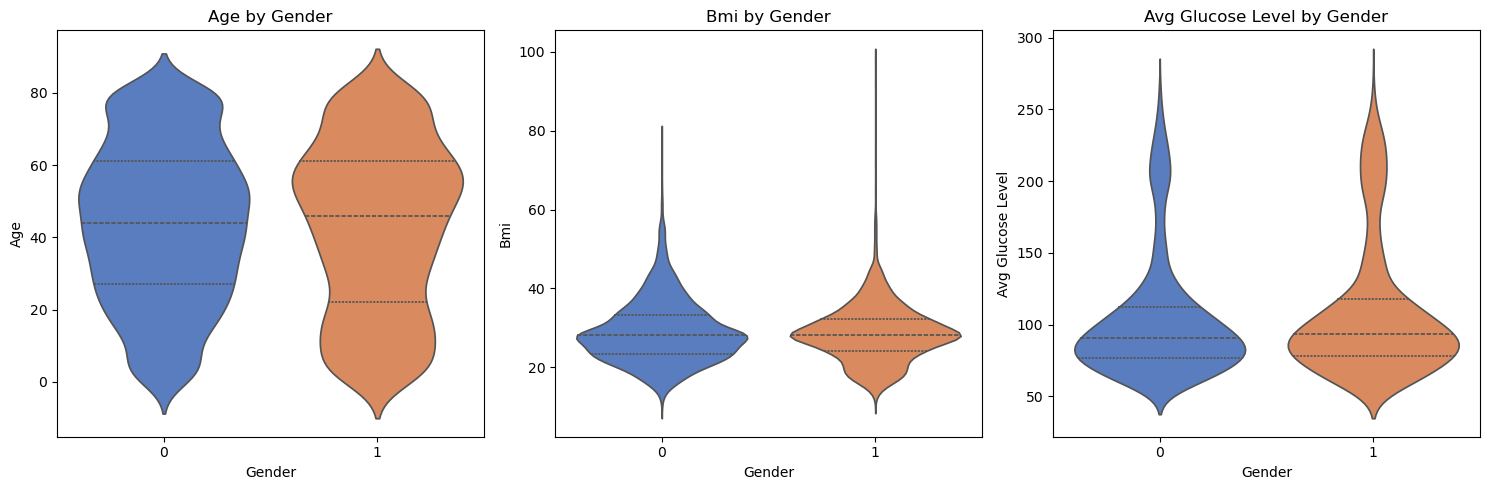

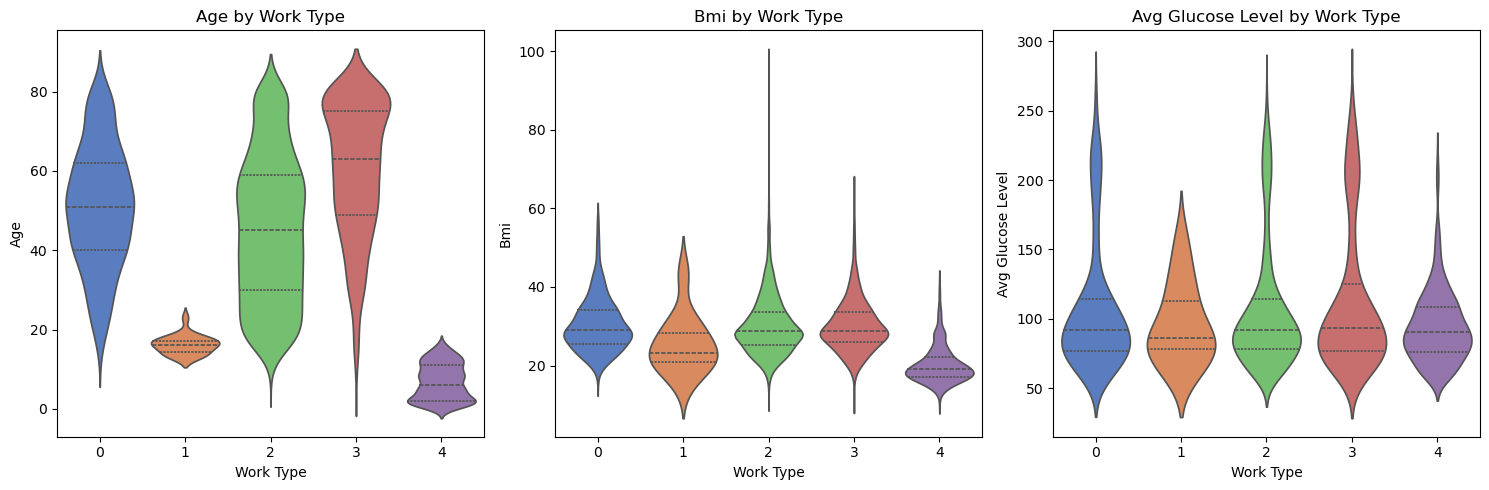

In [106]:
continuous_vars = ['age', 'bmi', 'avg_glucose_level']

categorical_vars = ['hypertension', 'heart_disease', 'smoking_status', 'gender', 'work_type']

def format_variable_name(var):
    return ' '.join(word.capitalize() for word in var.split('_'))


custom_palette = sns.color_palette(["#FFA07A", "#7FFF00", "#FF8C00", "#32CD32", "#FF4500"])  

for cat_var in categorical_vars:
    fig, axes = plt.subplots(1, len(continuous_vars), figsize=(15, 5), sharey=False)
    for i, cont_var in enumerate(continuous_vars):
        sns.violinplot(data=df, x=cat_var, y=cont_var, ax=axes[i], inner="quartile", palette="muted")
        axes[i].set_title(f'{format_variable_name(cont_var)} by {format_variable_name(cat_var)}')
        axes[i].set_xlabel(format_variable_name(cat_var))
        axes[i].set_ylabel(format_variable_name(cont_var))
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>

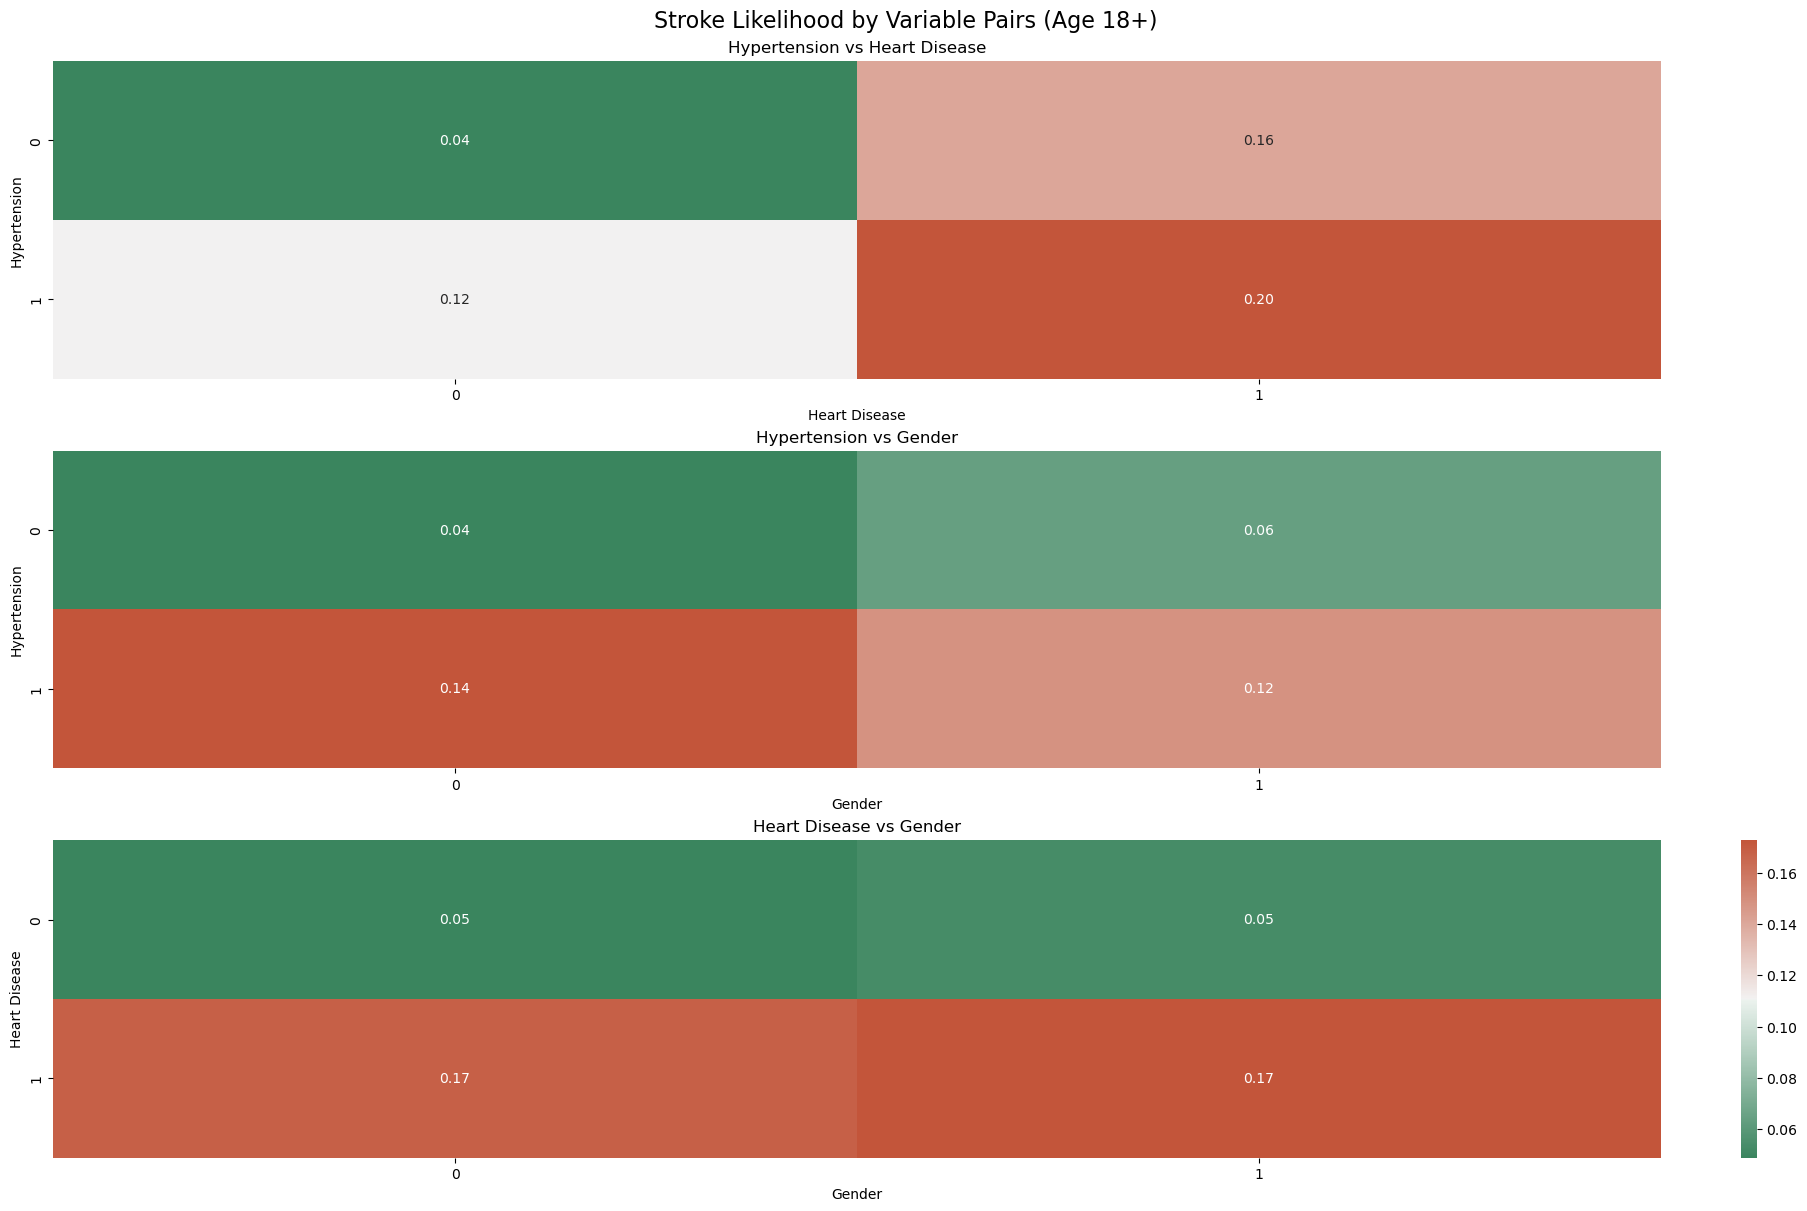

In [139]:
filtered_df = df[df["age"] >= 18].copy()

for col in ['hypertension', 'heart_disease', 'gender', 'work_type', 'stroke']:
    if filtered_df[col].dtype == 'object':  
        filtered_df[col] = pd.Categorical(filtered_df[col]) 
        

cmap = sns.diverging_palette(145, 20, as_cmap=True)
variable_pairs = [
    ('hypertension', 'heart_disease'),
    ('hypertension', 'gender'),
    ('heart_disease', 'gender'),
]

fig, axes = plt.subplots(len(variable_pairs), 1, figsize=(18, 12), constrained_layout=True)
if len(variable_pairs) == 1:
    axes = [axes]

def format_variable_name(var):
    return ' '.join(word.capitalize() for word in var.split('_'))

for i, (var1, var2) in enumerate(variable_pairs):
    ax = axes[i]

    
    heatmap_data = filtered_df.groupby([var1, var2])['stroke'].mean().unstack().fillna(0)
    if var1 in category_mappings:
        heatmap_data.index = heatmap_data.index.map(lambda x: category_mappings[var1].get(x, x))
    if var2 in category_mappings:
        heatmap_data.columns = heatmap_data.columns.map(lambda x: category_mappings[var2].get(x, x))

    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap=cmap, 
        cbar=(i == len(variable_pairs) - 1), 
        ax=ax
    )
    
    ax.set_title(f'{format_variable_name(var1)} vs {format_variable_name(var2)}')
    ax.set_xlabel(format_variable_name(var2))
    ax.set_ylabel(format_variable_name(var1))


plt.suptitle('Stroke Likelihood by Variable Pairs (Age 18+)', fontsize=16)
plt.show();


The correlation strength between stroke and hypertension, heart disease, and gender remains stable across both heatmaps.

# Conclusion

 **Stroke Data Analysis Summary**

This study analyzes stroke-related healthcare data, focusing on key variables influencing stroke occurrence. The dataset includes demographic and clinical factors such as age, BMI, hypertension, heart disease, smoking status, and glucose levels. Below are the key findings:

###  **Data Overview and Missing Values**
- The dataset was examined for missing values, with a heatmap visualization highlighting potential gaps.
- The BMI variable had some missing entries, requiring further handling.
- The dataset was cleaned and preprocessed for further analysis.

### **Conclusion**
Stroke is a complex medical condition influenced by multiple risk factors. Based on this analysis, the most critical variables associated with stroke occurrence include:

- **Age:** Older individuals are at significantly higher risk.
- **Hypertension:** One of the most prominent risk factors; individuals with high blood pressure showed increased stroke incidence.
- **Heart Disease:** Pre-existing cardiovascular conditions contributed to stroke likelihood.
- **Diabetes and Glucose Levels:** High glucose levels were frequently observed in stroke patients, indicating a link between metabolic disorders and stroke risk.
- **Smoking Status:** Current and former smokers exhibited a higher prevalence of stroke compared to non-smokers.
- **BMI and Obesity:** Although BMI alone was not a strong predictor, obesity was commonly observed among stroke patients.

These findings highlight the importance of preventive measures such as hypertension management, cardiovascular health monitoring, and lifestyle modifications. 



# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |